In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from mpl_toolkits import mplot3d
import matplotlib
import matplotlib.pyplot as plt

import Bargaining as brg

# plot style
linestyles = ['-','--','-.',':',':']
markers = ['o','s','D','*','P']
linewidth = 2
font_size = 17
font = {'size':font_size}
matplotlib.rc('font', **font)

plt.rcParams.update({'figure.max_open_warning': 0,'text.usetex': False})


In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [2]:
from Bargaining import HouseholdModelClass
model = HouseholdModelClass()

In [3]:
model.solve()

t: 9


/Users/joshuaclyne/anaconda3/lib/python3.11/site-packages/scipy/optimize/_optimize.py:404: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


t: 8
t: 7
t: 6
t: 5
t: 4
t: 3
t: 2
t: 1
t: 0


In [6]:
model.simulate()

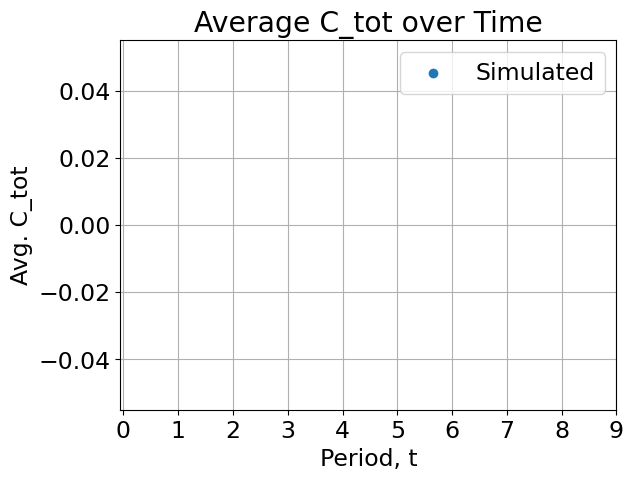

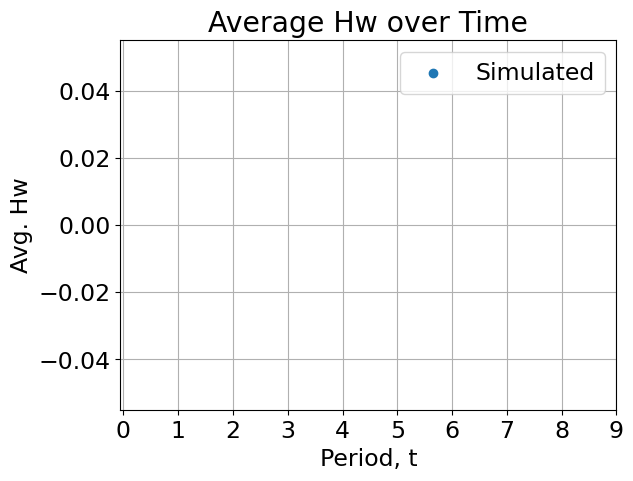

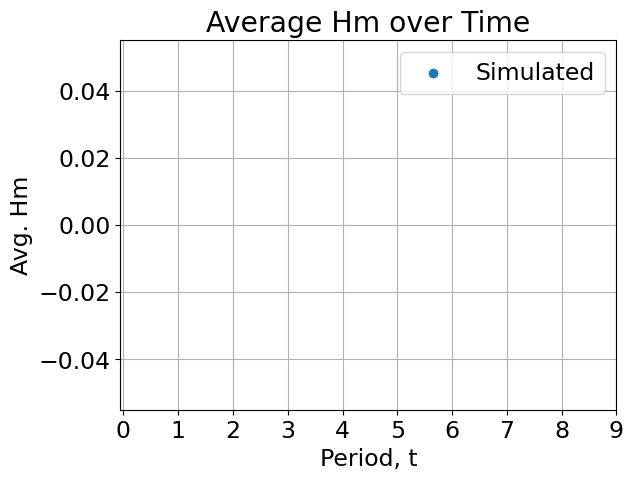

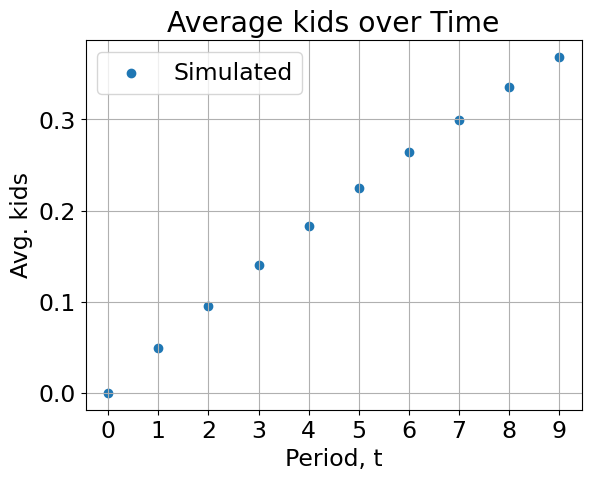

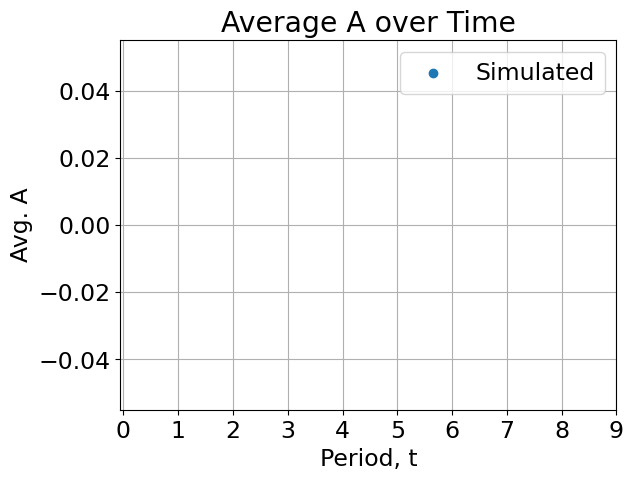

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# List of variables to plot
variables_to_plot = ['C_tot', 'Hw', 'Hm', 'kids', 'A']

# Plot behavior for each variable
for var in variables_to_plot:
    fig, ax = plt.subplots()
    ax.scatter(range(model.par.simT), np.mean(getattr(model.sim, var), axis=0), label='Simulated')
    ax.set(xlabel='Period, t', ylabel=f'Avg. {var}', xticks=range(model.par.simT))
    ax.legend()
    ax.grid(True)
    plt.title(f'Average {var} over Time')
    plt.show()


AttributeError: 'types.SimpleNamespace' object has no attribute 'n'

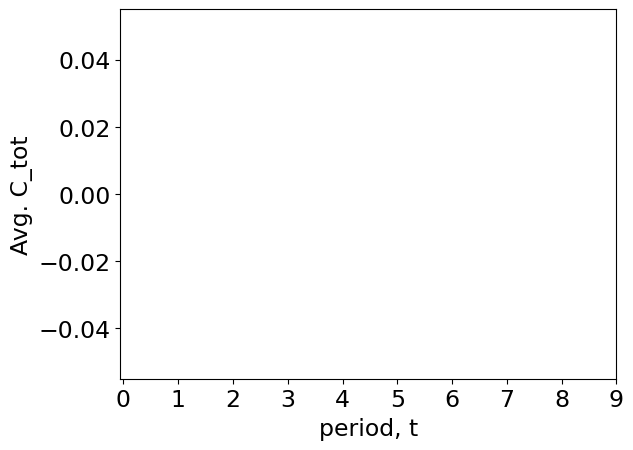

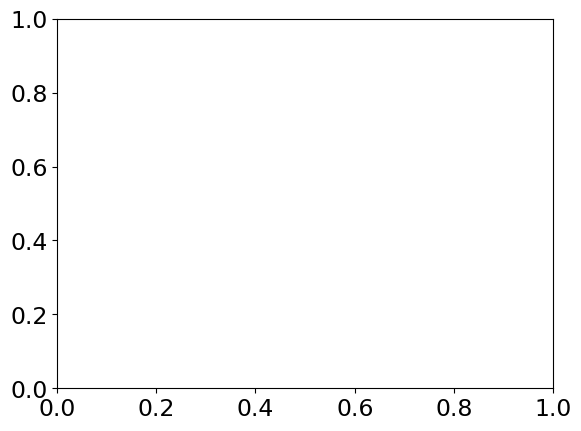

In [10]:
# plot behavior
for var in ('C_tot','n'):
    fig, ax = plt.subplots()
    ax.scatter(range(model.par.simT),np.mean(getattr(model.sim,var),axis=0),label='Simulated')
    ax.set(xlabel='period, t',ylabel=f'Avg. {var}',xticks=range(model.par.simT));

In [ ]:
model.solve_couple(9)

In [ ]:
model.value_of_choice_couple(0.32752066, 0.5, 5, 0.9,2, 2, 1,2,0.5,0.2, 0.2, 0)

In [ ]:
model.solve_single(t=9)

In [ ]:
model.intraperiod_allocation(0.5,1,-0.1,par)

In [ ]:
print(model)

# Solve and simulate from alternative models

In [ ]:
# settings for models to solve
T = 8
specs = {
    'model 1':{'latexname':'$\kappa_w=0.5$', 'par':{'sigma_love':0.1,'T':T,'div_A_share':0.5}},
    'model 2':{'latexname':'$\kappa_w=0.1$', 'par':{'sigma_love':0.1,'T':T,'div_A_share':0.1}},
}


# Simulated paths

**Questions:**
1. Why is the average love in couple increasing over the life cycle?
2. How does wealth accumulation depend on initial power and distribution upon divorce?

In [ ]:
var_list = ('power','love','couple','Cw_priv','Cm_priv','Cw_pub','C_tot','A')
model_list = ('model 1','model 2')

par = models[name].par
for init_power_idx in (5,10):
    for init_love in (0.0,0.2): 
        string = f'init. power:{par.grid_power[init_power_idx]:2.3f}, love:{init_love:2.2f}'

        for i,name in enumerate(model_list):
            model = models[name]

            # show how starting of in a low bargaining power gradually improves
            model.sim.init_power_idx[:] = init_power_idx
            model.sim.init_love[:] = init_love 
            model.simulate()
            
        for var in var_list:

            fig, ax = plt.subplots()
            
            for i,name in enumerate(model_list):
                model = models[name]

                # pick out couples (if not the share of couples is plotted)
                if var == 'couple':
                    nan = 0.0
                else:
                    I = model.sim.couple<1
                    nan = np.zeros(I.shape)
                    nan[I] = np.nan

                # pick relevant variable for couples
                y = getattr(model.sim,var)        
                y = np.nanmean(y + nan,axis=0)

                ax.plot(y,marker=markers[i],linestyle=linestyles[i],linewidth=linewidth,label=model.spec['latexname']);
                ax.set(xlabel='age',ylabel=f'{var}',title=string);

            plt.legend()
            plt.tight_layout()
                